In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd
from transformers import GPT2Tokenizer, GPT2Model, GPT2LMHeadModel, AutoModel, pipeline
import nltk
import random
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt

/home/ubuntu/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
[nltk_data] Downloading package punkt to /home/ubuntu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ubuntu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
!pip install mlxtend

In [2]:
sentiment_pipeline = pipeline(task = "sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [3]:
with open('/home/ubuntu/Darwin_Gatsby/gatsby_raw.txt', 'r') as file:
    gatsby = file.read().replace('\n', ' ')

with open('/home/ubuntu/Darwin_Gatsby/origin_of_species_raw.txt', 'r') as file:
    origin = file.read().replace('\n', ' ')

In [4]:
import re
import string
from collections import Counter
from collections import defaultdict

def clean_book(book_sen_list):
    clean_book_sen_list = []
    for sen in book_sen_list:
        # ref https://stackoverflow.com/questions/8689795/how-can-i-remove-non-ascii-characters-but-leave-periods-and-spaces
        sen = re.sub(r'^\s*|\s\s*', ' ', sen).strip().rstrip().lstrip()
        printable = set(string.printable)
        sen = filter(lambda x: x in printable, sen)
        sen = ''.join(filter(lambda x: x in printable, sen))
        clean_book_sen_list.append(sen)
        
    return clean_book_sen_list

def find_passages(book_sen_list, sentence_starts):
    
    passages = []
    sen_index = -1
    while True:
        sen_index += 1
        if sen_index >= len(book_sen_list):
            break
            
        sen = book_sen_list[sen_index]
        
        use_sentence = False
        for sentence_start in bigram_overlap:
            if sen.startswith(sentence_start):
                use_sentence = True
                break
              
        passage = sen
        if use_sentence:
            while len(passage.split()) < 50:
                sen_index += 1
                sen = book_sen_list[sen_index]
                passage += " " + sen
                
            passages.append(' '.join(passage.split()[:50]))
        
    return passages
                

In [5]:
gatsby_sen_list = nltk.sent_tokenize(gatsby)
origin_sen_list = nltk.sent_tokenize(origin)

clean_gatsby_sen_list = clean_book(gatsby_sen_list)
clean_origin_sen_list = clean_book(origin_sen_list)





In [376]:
print(len(clean_gatsby_sen_list))
print(len(clean_origin_sen_list))

2439
3981


In [6]:
import os

pos_path = "/home/ubuntu/IMDB_train/pos/"
neg_path = "/home/ubuntu/IMDB_train/neg/"
home_path = "/home/ubuntu/"

pos_token_list = []
pos_text_list = []
neg_token_list = []
neg_text_list = []

os.chdir(pos_path)
  

for file in os.listdir():
    if not file.endswith('.txt'):
        continue
    with open(pos_path+file, 'r') as f:
        pos_text = f.read()
        # put into text list
        pos_text_list.append(pos_text)
        #tokenize and put into token list
        #pos_token_list.append(base_tokenizer.encode(pos_text, return_tensors = 'pt'))

os.chdir(neg_path)

for file in os.listdir():
    if not file.endswith('.txt'):
        continue
    with open(neg_path+file, 'r') as f:
        neg_text = f.read()
        # put into text list
        neg_text_list.append(neg_text)
        #tokenize and put into token list
        #neg_token_list.append(base_tokenizer.encode(neg_text_list, return_tensors = 'pt'))
os.chdir(home_path)

In [7]:
!pwd

/home/ubuntu


In [8]:
from io import StringIO
from html.parser import HTMLParser

# ref https://stackoverflow.com/questions/753052/strip-html-from-strings-in-python
class MLStripper(HTMLParser):
    def __init__(self):
        super().__init__()
        self.reset()
        self.strict = False
        self.convert_charrefs= True
        self.text = StringIO()
    def handle_data(self, d):
        self.text.write(d)
    def get_data(self):
        return self.text.getvalue()

def strip_tags(html):
    s = MLStripper()
    s.feed(html)
    return s.get_data()
# cleaned = test_text_pos.replace('<br /><br />', ' ')
# print(cleaned)

def clean_imdb(review_list):
    for review in range(len(review_list)):
        cleaned_review = strip_tags(review_list[review])
        review_list[review] = cleaned_review

In [9]:
clean_imdb(pos_text_list)
clean_imdb(neg_text_list)

In [10]:
def reviews_to_sen_list(reviews):
    review_sen_list = []
    for review in reviews:
        review_sen_list = review_sen_list + nltk.sent_tokenize(review)
    return review_sen_list 
    

In [11]:
# def truncate_str_for_sen_embed(text_list, max_len=384):
#     shortened_texts = []
#     for text in text_list:
#         start = 0
#         end = max_len
#         while True:
#             if len(text) <= max_len:
#                 shortened_texts.append(text)
#                 break
#             shortened_texts.append(text[:max_len])
#             text = text[max_len:]
            
#     return shortened_texts

In [12]:
evaluation_df = pd.read_csv("/home/ubuntu/ModelEvaluationSet.csv")

In [13]:
evaluation_df

,random,source,passage
0,0.001068,FINETUNED_GATSBY,If I could just buy a cheap car and go somewhe...
1,0.002018,POS_REAL,"I have no idea how to describe this movie, and..."
2,0.002146,FINETUNED_GATSBY,Nothing at all. She had been a girl for years....
3,0.002283,GATSBY_SAT,"But in the long run, extending the same proces..."
4,0.004556,FINETUNED_NEG,I feel like I am being compared to these two m...
...,...,...,...
1295,0.996962,FINETUNED_POS,Now it's clear that this was not a TV show. I ...
1296,0.997499,FINETUNED_GATSBY,"As soon as I got home, I started calling the p..."
1297,0.999169,POS_SAT,"Now, if you're like me, you're probably not ve..."
1298,0.999313,GATSBY_SAT,"In fact, the West, through NATO allies, and th..."


In [14]:
labels_alpha = sorted(evaluation_df['source'].unique())

In [15]:
labels_dictionary = {}
for label in range(len(labels_alpha)):
    labels_dictionary[labels_alpha[label]] = label
print(labels_dictionary)
    

{'FINETUNED_GATSBY': 0, 'FINETUNED_NEG': 1, 'FINETUNED_ORIGIN': 2, 'FINETUNED_POS': 3, 'GATSBY_REAL': 4, 'GATSBY_SAT': 5, 'GPT_STANDARD': 6, 'NEG_REAL': 7, 'NEG_SAT': 8, 'ORIGIN_REAL': 9, 'ORIGIN_SAT': 10, 'POS_REAL': 11, 'POS_SAT': 12}


In [16]:
pos_extracts = evaluation_df.loc[evaluation_df['source'] == 'POS_REAL']
neg_extracts = evaluation_df.loc[evaluation_df['source'] == 'NEG_REAL']
gatsby_extracts = evaluation_df.loc[evaluation_df['source'] == 'GATSBY_REAL']
origin_extracts = evaluation_df.loc[evaluation_df['source'] == 'ORIGIN_REAL']


neg_fine_tuned = evaluation_df.loc[evaluation_df['source'] == 'FINETUNED_NEG']
pos_fine_tuned = evaluation_df.loc[evaluation_df['source'] == 'FINETUNED_POS']
gatsby_fine_tuned = evaluation_df.loc[evaluation_df['source'] == 'FINETUNED_GATSBY']
origin_fine_tuned = evaluation_df.loc[evaluation_df['source'] == 'FINETUNED_ORIGIN']

neg_sat = evaluation_df.loc[evaluation_df['source'] == 'NEG_SAT']
pos_sat = evaluation_df.loc[evaluation_df['source'] == 'POS_SAT']
gatsby_sat = evaluation_df.loc[evaluation_df['source'] == 'GATSBY_SAT']
origin_sat = evaluation_df.loc[evaluation_df['source'] == 'ORIGIN_SAT']



In [17]:
gatsby_extracts_list = gatsby_extracts['passage'].tolist()
origin_extracts_list = origin_extracts['passage'].tolist()
gatsby_origin_real_test = gatsby_extracts_list + origin_extracts_list
pos_extracts_list = pos_extracts['passage'].tolist()
neg_extracts_list = neg_extracts['passage'].tolist()
pos_neg_real_test =  neg_extracts_list + pos_extracts_list 


gatsby_fine_tuned_list = gatsby_fine_tuned['passage'].tolist()
origin_fine_tuned_list = origin_fine_tuned['passage'].tolist()
gatsby_origin_fine_tuned_test = gatsby_fine_tuned_list + origin_fine_tuned_list
pos_fine_tuned_list = pos_fine_tuned['passage'].tolist()
neg_fine_tuned_list = neg_fine_tuned['passage'].tolist()
pos_neg_fine_tuned_test = neg_fine_tuned_list + pos_fine_tuned_list

gatsby_sat_list = gatsby_sat['passage'].tolist()
origin_sat_list = origin_sat['passage'].tolist()
gatsby_origin_sat_test = gatsby_sat_list + origin_sat_list
pos_sat_list = pos_sat['passage'].tolist()
neg_sat_list = neg_sat['passage'].tolist()
pos_neg_sat_test = neg_sat_list + pos_sat_list 

200


In [18]:
def remove_extract_overlap(sen_list, extracts_list):
    word_counter = 0
    new_sen_list = []
    found_match = False
    for sen in sen_list:
        split_sen = sen.split()

        if not found_match:
            for passage in extracts_list:
                split_passage = passage.split()
                if split_sen[:4] ==  split_passage[:4]:
                    found_match = True

        if not found_match:
            new_sen_list.append(sen)

        else:
            word_counter += len(split_sen)
            if word_counter >= 50:
                found_match = False
                word_counter = 0
    return new_sen_list


In [19]:
train_gatsby_sen_list = remove_extract_overlap(clean_gatsby_sen_list, gatsby_extracts_list)

In [20]:
train_origin_sen_list = remove_extract_overlap(clean_origin_sen_list, origin_extracts_list)

In [21]:
neg_sen_list = reviews_to_sen_list(neg_text_list)
pos_sen_list = reviews_to_sen_list(pos_text_list)
print(len(pos_text_list))
print(len(pos_sen_list))

12500
132744


In [22]:
# print(neg_sen_list[0])

In [23]:
train_neg_sen_list = remove_extract_overlap(neg_sen_list, neg_extracts_list)

In [24]:
train_pos_sen_list = remove_extract_overlap(pos_sen_list, pos_extracts_list)

In [25]:
gatsby_test_labels = [0 for i in range(100)]
origin_test_labels = [1 for i in range(100)]
test_labels = gatsby_test_labels + origin_test_labels
# test_labels_temp = origin_test_labels + gatsby_test_labels

In [26]:
print(len(train_gatsby_sen_list))
print(len(train_origin_sen_list))

2131
3693


In [27]:
gatsby_train_correct_labels = [0 for i in range(len(train_gatsby_sen_list))]
origin_train_correct_labels = [1 for i in range(len(train_origin_sen_list))]
g_o_train_labels = gatsby_train_correct_labels + origin_train_correct_labels
print(len(g_o_train_labels))

5824


In [28]:
neg_train_correct_labels = [0 for i in range(len(train_neg_sen_list))]
pos_train_correct_labels = [1 for i in range(len(train_pos_sen_list))]
pos_neg_train_labels = neg_train_correct_labels + pos_train_correct_labels
print(len(pos_neg_train_labels))

267572


In [29]:
corpus_gatsby_origins_train = train_gatsby_sen_list + train_origin_sen_list
print(len(corpus_gatsby_origins_train))

vectorizer_g_o = CountVectorizer(ngram_range=(1,3))

tranformed_corpus_gatsby_origin_train = vectorizer_g_o.fit_transform(corpus_gatsby_origins_train)

5824


In [30]:
corpus_pos_neg_train = train_neg_sen_list + train_pos_sen_list
print(len(corpus_pos_neg_train))

vectorizer_pos_neg = CountVectorizer(ngram_range=(1,3))

tranformed_corpus_pos_neg_train = vectorizer_pos_neg.fit_transform(corpus_pos_neg_train)
# print(tranformed_corpus_pos_neg_train[0])

267572
  (0, 3767762)	2
  (0, 4152952)	1
  (0, 1180584)	1
  (0, 1879759)	1
  (0, 1991234)	1
  (0, 1005847)	1
  (0, 4446873)	1
  (0, 87885)	1
  (0, 2846926)	1
  (0, 86746)	1
  (0, 2970385)	1
  (0, 4274432)	1
  (0, 3425571)	1
  (0, 1886240)	2
  (0, 3999409)	1
  (0, 2520857)	1
  (0, 550372)	1
  (0, 460487)	1
  (0, 3093925)	1
  (0, 1864129)	1
  (0, 330854)	1
  (0, 418536)	1
  (0, 121885)	1
  (0, 3913583)	1
  (0, 4152961)	1
  :	:
  (0, 330880)	1
  (0, 418975)	1
  (0, 3913584)	1
  (0, 4152962)	1
  (0, 1180923)	1
  (0, 1879879)	1
  (0, 2003331)	1
  (0, 1005887)	1
  (0, 4446877)	1
  (0, 88273)	1
  (0, 2847275)	1
  (0, 86859)	1
  (0, 3874744)	1
  (0, 2971138)	1
  (0, 4274794)	1
  (0, 3425959)	1
  (0, 1925652)	1
  (0, 4015043)	1
  (0, 2523291)	1
  (0, 550387)	1
  (0, 1890732)	1
  (0, 464419)	1
  (0, 3093927)	1
  (0, 1864435)	1
  (0, 330881)	1


In [ ]:
corpus_most_train = train_neg_sen_list + train_pos_sen_list
# print(len(corpus_pos_neg_train))

# vectorizer_all = CountVectorizer(ngram_range=(1,3))

# tranformed_corpus_all = vectorizer_pos_neg.fit_transform(corpus_pos_neg_train)
# # print(tranformed_corpus_pos_neg_train[0])



In [31]:
print(tranformed_corpus_pos_neg_train[0])

  (0, 3767762)	2
  (0, 4152952)	1
  (0, 1180584)	1
  (0, 1879759)	1
  (0, 1991234)	1
  (0, 1005847)	1
  (0, 4446873)	1
  (0, 87885)	1
  (0, 2846926)	1
  (0, 86746)	1
  (0, 2970385)	1
  (0, 4274432)	1
  (0, 3425571)	1
  (0, 1886240)	2
  (0, 3999409)	1
  (0, 2520857)	1
  (0, 550372)	1
  (0, 460487)	1
  (0, 3093925)	1
  (0, 1864129)	1
  (0, 330854)	1
  (0, 418536)	1
  (0, 121885)	1
  (0, 3913583)	1
  (0, 4152961)	1
  :	:
  (0, 330880)	1
  (0, 418975)	1
  (0, 3913584)	1
  (0, 4152962)	1
  (0, 1180923)	1
  (0, 1879879)	1
  (0, 2003331)	1
  (0, 1005887)	1
  (0, 4446877)	1
  (0, 88273)	1
  (0, 2847275)	1
  (0, 86859)	1
  (0, 3874744)	1
  (0, 2971138)	1
  (0, 4274794)	1
  (0, 3425959)	1
  (0, 1925652)	1
  (0, 4015043)	1
  (0, 2523291)	1
  (0, 550387)	1
  (0, 1890732)	1
  (0, 464419)	1
  (0, 3093927)	1
  (0, 1864435)	1
  (0, 330881)	1


In [32]:
clf_g_o = LogisticRegression(random_state=0, solver='liblinear').fit(tranformed_corpus_gatsby_origin_train, g_o_train_labels)

In [33]:
clf_pos_neg = LogisticRegression(random_state=0, solver='liblinear').fit(tranformed_corpus_pos_neg_train, pos_neg_train_labels)


In [34]:
# print(len(train_neg_sen_list))
# print(len(train_pos_sen_list))

In [35]:
# def vectorize_test(vectorizer, test_corpus):
transformed_g_o_real_test = vectorizer_g_o.transform(gatsby_origin_real_test)
transformed_pos_neg_real_test = vectorizer_pos_neg.transform(pos_neg_real_test)

transformed_g_o_fine_tuned_test = vectorizer_g_o.transform(gatsby_origin_fine_tuned_test)
transformed_pos_neg_fine_tuned_test = vectorizer_pos_neg.transform(pos_neg_fine_tuned_test)


transformed_g_o_sat_test = vectorizer_g_o.transform(gatsby_origin_sat_test)
transformed_pos_neg_sat_test = vectorizer_pos_neg.transform(pos_neg_sat_test)

In [36]:
print(clf_g_o.score(transformed_g_o_real_test, test_labels))
print(clf_pos_neg.score(transformed_pos_neg_real_test, test_labels))

print(clf_g_o.score(transformed_g_o_fine_tuned_test, test_labels))
print(clf_pos_neg.score(transformed_pos_neg_fine_tuned_test, test_labels))

print(clf_g_o.score(transformed_g_o_sat_test, test_labels))
print(clf_pos_neg.score(transformed_pos_neg_sat_test, test_labels))

0.98
0.85
0.935
0.775
0.815
0.685


In [60]:
real_g_o_pred = clf_g_o.predict(transformed_g_o_real_test)
real_pos_neg_pred = clf_pos_neg.predict(transformed_pos_neg_real_test)

fine_tuned_g_o_pred = clf_g_o.predict(transformed_g_o_fine_tuned_test)
fine_tuned_pos_neg_pred = clf_pos_neg.predict(transformed_pos_neg_fine_tuned_test)

sat_g_o_pred = clf_g_o.predict(transformed_g_o_sat_test)
sat_pos_neg_pred = clf_pos_neg.predict(transformed_pos_neg_sat_test)

In [37]:
pos_neg_real_test_sentiment_list = sentiment_pipeline(pos_neg_real_test)
pos_neg_fine_tuned_test_sentiment_list = sentiment_pipeline(pos_neg_fine_tuned_test)
pos_neg_sat_test_sentiment_list = sentiment_pipeline(pos_neg_sat_test)


In [38]:
# pos_neg_real_test_sentiment_list

In [39]:
def dict_to_labels_list(label_dicts):
    labels_list = []
    for label_dict in label_dicts:
        if label_dict['label'] == 'POSITIVE':
            labels_list.append(1)
        if label_dict['label'] == 'NEGATIVE':
            labels_list.append(0)
    return labels_list
            
        

In [40]:
pos_neg_real_test_sentiment_pred = dict_to_labels_list(pos_neg_real_test_sentiment_list)
pos_neg_fine_tuned_test_sentiment_pred = dict_to_labels_list(pos_neg_fine_tuned_test_sentiment_list)
pos_neg_sat_test_sentiment_list_pred = dict_to_labels_list(pos_neg_sat_test_sentiment_list)

In [42]:
from sklearn.metrics import accuracy_score
print(accuracy_score(pos_neg_real_test_sentiment_pred, test_labels))
print(accuracy_score(pos_neg_fine_tuned_test_sentiment_pred, test_labels))
print(accuracy_score(pos_neg_sat_test_sentiment_list_pred, test_labels))
    


0.795
0.735
0.64


In [61]:
from sklearn.metrics import confusion_matrix


real_g_o_CM = confusion_matrix(test_labels, real_g_o_pred)
real_pos_neg_CM = confusion_matrix(test_labels, real_pos_neg_pred)

fine_tuned_g_o_CM = confusion_matrix(test_labels, fine_tuned_g_o_pred)
fine_tuned_pos_neg_CM = confusion_matrix(test_labels, fine_tuned_pos_neg_pred)

sat_g_o_CM = confusion_matrix(test_labels, sat_g_o_pred,)
sat_pos_neg_CM = confusion_matrix(test_labels, sat_pos_neg_pred,)

In [62]:
print(fine_tuned_g_o_CM)

[[89 11]
 [ 2 98]]


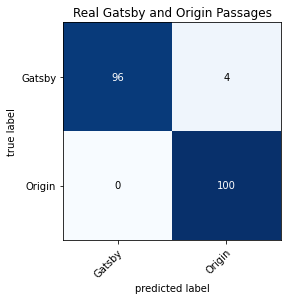

In [76]:
from mlxtend.plotting import plot_confusion_matrix
class_names = ['Gatsby', 'Origin']
fig, ax = plot_confusion_matrix(conf_mat=real_g_o_CM, class_names=class_names)
plt.title("Real Gatsby and Origin Passages")
plt.show()

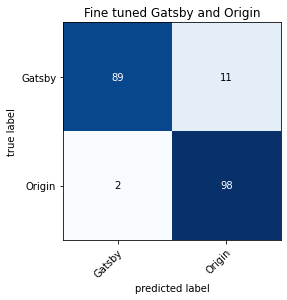

In [77]:
from mlxtend.plotting import plot_confusion_matrix
class_names = ['Gatsby', 'Origin']
fig, ax = plot_confusion_matrix(conf_mat=fine_tuned_g_o_CM, class_names=class_names)
plt.title("Fine tuned Gatsby and Origin")
plt.show()

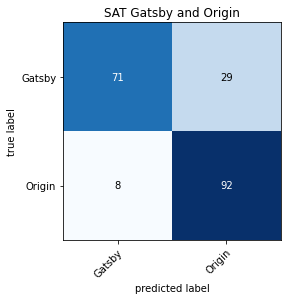

In [78]:
from mlxtend.plotting import plot_confusion_matrix
class_names = ['Gatsby', 'Origin']
fig, ax = plot_confusion_matrix(conf_mat=sat_g_o_CM, class_names=class_names)
plt.title("SAT Gatsby and Origin")
plt.show()

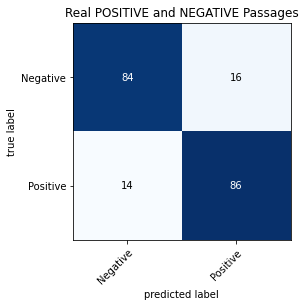

In [79]:
from mlxtend.plotting import plot_confusion_matrix
class_names = ['Negative', 'Positive']
fig, ax = plot_confusion_matrix(conf_mat=real_pos_neg_CM, class_names=class_names)
plt.title("Real POSITIVE and NEGATIVE Passages")
plt.show()

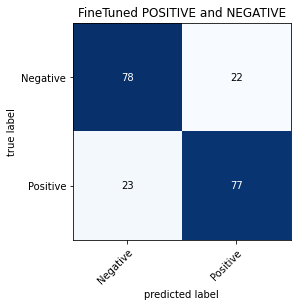

In [80]:
from mlxtend.plotting import plot_confusion_matrix
class_names = ['Negative', 'Positive']
fig, ax = plot_confusion_matrix(conf_mat=fine_tuned_pos_neg_CM, class_names=class_names)
plt.title("FineTuned POSITIVE and NEGATIVE")
plt.show()

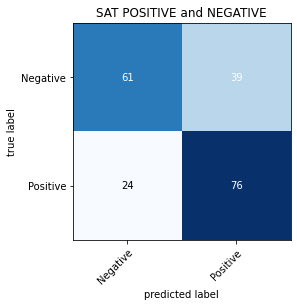

In [81]:
from mlxtend.plotting import plot_confusion_matrix
class_names = ['Negative', 'Positive']
fig, ax = plot_confusion_matrix(conf_mat=sat_pos_neg_CM, class_names=class_names)
plt.title("SAT POSITIVE and NEGATIVE")
plt.show()

In [116]:
human_results_df = pd.read_csv("/home/ubuntu/Human_results.csv", header = None)

In [117]:
human_results_df

,0,1,2,3,4,5,6,7,8
0,0.001068,FINETUNED_GATSBY,If I could just buy a cheap car and go somewhe...,2.0,4.0,1.0,5.0,5.0,3.0
1,0.002018,POS_REAL,"I have no idea how to describe this movie, and...",4.0,2.0,4.0,4.0,4.0,4.0
2,0.002146,FINETUNED_GATSBY,Nothing at all. She had been a girl for years....,3.0,5.0,2.0,3.0,4.0,4.0
3,0.002283,GATSBY_SAT,"But in the long run, extending the same proces...",1.0,1.0,5.0,2.0,0.0,1.0
4,0.004556,FINETUNED_NEG,I feel like I am being compared to these two m...,3.0,4.0,2.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...
1295,0.996962,FINETUNED_POS,Now it's clear that this was not a TV show. I ...,3.0,4.0,2.0,3.0,4.0,4.0
1296,0.997499,FINETUNED_GATSBY,"As soon as I got home, I started calling the p...",1.0,4.0,1.0,4.0,3.0,4.0
1297,0.999169,POS_SAT,"Now, if you're like me, you're probably not ve...",5.0,4.0,0.0,5.0,4.0,4.0
1298,0.999313,GATSBY_SAT,"In fact, the West, through NATO allies, and th...",5.0,4.0,1.0,5.0,5.0,5.0


In [118]:
import numpy as np

In [119]:
# # human_results_df['Sentiment'] = np.where(df['3']!= np.nan, True, False)

# human_results_df = human_results_df.fillna(-1)

In [120]:
human_results_df

,0,1,2,3,4,5,6,7,8
0,0.001068,FINETUNED_GATSBY,If I could just buy a cheap car and go somewhe...,2.0,4.0,1.0,5.0,5.0,3.0
1,0.002018,POS_REAL,"I have no idea how to describe this movie, and...",4.0,2.0,4.0,4.0,4.0,4.0
2,0.002146,FINETUNED_GATSBY,Nothing at all. She had been a girl for years....,3.0,5.0,2.0,3.0,4.0,4.0
3,0.002283,GATSBY_SAT,"But in the long run, extending the same proces...",1.0,1.0,5.0,2.0,0.0,1.0
4,0.004556,FINETUNED_NEG,I feel like I am being compared to these two m...,3.0,4.0,2.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...
1295,0.996962,FINETUNED_POS,Now it's clear that this was not a TV show. I ...,3.0,4.0,2.0,3.0,4.0,4.0
1296,0.997499,FINETUNED_GATSBY,"As soon as I got home, I started calling the p...",1.0,4.0,1.0,4.0,3.0,4.0
1297,0.999169,POS_SAT,"Now, if you're like me, you're probably not ve...",5.0,4.0,0.0,5.0,4.0,4.0
1298,0.999313,GATSBY_SAT,"In fact, the West, through NATO allies, and th...",5.0,4.0,1.0,5.0,5.0,5.0


In [203]:
# human_results_df['Sentiment'] = np.where((human_results_df[3] > 2.88) & (human_results_df[3] > 0))
# pos_human_l = np.where((human_results_df[3] > 2.88) & (human_results_df[3] > 0))
# neg_human_l = np.where((human_results_df[3] <= 2.88) & (human_results_df[3] != np.nan))

In [275]:
pos_human_l = np.where((human_results_df[3] > 2.5) & (human_results_df[3] > 0))
neg_human_l = np.where((human_results_df[3] <= 2.5) & (human_results_df[3] != np.nan))

In [276]:
what_model = human_results_df[1].tolist()
what_model[0]

'FINETUNED_GATSBY'

In [277]:
'GATSBY' in what_model[0]

True

In [278]:
human_results_df.values[1037]

array([0.776637, 'POS_REAL',
       'I was a fan of the book ever since third grade, so of course I had watched the movie, read the sequel, and then watched the television show. It was a good show in itself, and now as an adult I still enjoy the show. My only real problem with',
       nan, nan, nan, nan, nan, nan, -1], dtype=object)

In [279]:
pos_human_l = pos_human_l[0].tolist()

In [280]:
neg_human_l = neg_human_l[0].tolist()

In [348]:
HE_sent_score_list = human_results_df[3].tolist()
HE_G_score_list = human_results_df[4].tolist()
HE_O_score_list = human_results_df[5].tolist()

In [349]:
# HE_sentiment_score_list[1037]

In [350]:
import math
HG_score_list_a = []
for score in HE_G_score_list:
    if not math.isnan(score):
        new_score = score/5
        HG_score_list_a.append(new_score)
    else:
        HG_score_list_a.append(-1)
HO_score_list_a = []
for score in HE_O_score_list:
    if not math.isnan(score):
        new_score = score/5
        HO_score_list_a.append(new_score)
    else:
        HO_score_list_a.append(-1)

In [351]:
import math
HG_score_list = []
for score in HE_G_score_list:
    if not math.isnan(score):
        HG_score_list.append(score)
    else:
        HG_score_list.append(-1)
HO_score_list = []
for score in HE_O_score_list:
    if not math.isnan(score):
        
        HO_score_list.append(score)
    else:
        HG_score_list.append(-1)
        
HS_score_list = []
for score in HE_sent_score_list:

    if not math.isnan(score):
        
        HS_score_list.append(score)
    else:
        HS_score_list.append(-1)     
        

In [352]:
# print(len(new_score_list))

In [353]:
human_sent_labels = [-1 for i in range(1300)]
for s_lab in pos_human_l:
    human_sent_labels[s_lab] = 1
    
for s_lab in neg_human_l:
    human_sent_labels[s_lab] = 0

    

In [354]:
human_results_df['Sentiment_transform'] = human_sent_labels

In [355]:
print(len(neg_human_l + pos_human_l ))

561


In [356]:
# pos_extracts = evaluation_df.loc[evaluation_df['source'] == 'POS_REAL']
# neg_extracts = evaluation_df.loc[evaluation_df['source'] == 'NEG_REAL']
# gatsby_extracts = evaluation_df.loc[evaluation_df['source'] == 'GATSBY_REAL']
# origin_extracts = evaluation_df.loc[evaluation_df['source'] == 'ORIGIN_REAL']


# neg_fine_tuned = evaluation_df.loc[evaluation_df['source'] == 'FINETUNED_NEG']
# pos_fine_tuned = evaluation_df.loc[evaluation_df['source'] == 'FINETUNED_POS']
# gatsby_fine_tuned = evaluation_df.loc[evaluation_df['source'] == 'FINETUNED_GATSBY']
# origin_fine_tuned = evaluation_df.loc[evaluation_df['source'] == 'FINETUNED_ORIGIN']

# neg_sat = evaluation_df.loc[evaluation_df['source'] == 'NEG_SAT']
# pos_sat = evaluation_df.loc[evaluation_df['source'] == 'POS_SAT']
# gatsby_sat = evaluation_df.loc[evaluation_df['source'] == 'GATSBY_SAT']
# origin_sat = evaluation_df.loc[evaluation_df['source'] == 'ORIGIN_SAT']



In [357]:
all_passages = evaluation_df['passage'].tolist()
transformed_pos_neg_all_passages = vectorizer_pos_neg.transform(all_passages)
transformed_GO_all_passages = vectorizer_g_o.transform(all_passages)


In [358]:
all_passages_log_sent = clf_pos_neg.predict(transformed_pos_neg_all_passages)

In [359]:
all_passages_GO_prob = clf_g_o.predict_proba(transformed_GO_all_passages)

In [360]:
all_passages_log_sent_prob = clf_pos_neg.predict_proba(transformed_pos_neg_all_passages)

In [361]:
all_passages_GO_prob[0]

array([9.99406606e-01, 5.93394146e-04])

In [362]:
# human_G_labels = [-1 for i in range(1300)]
# human_O_labels = [-1 for i in range(1300)]

In [363]:
print(len(HG_score_list_a))

1300


In [497]:
G_human_clf_disagreement_sum = 0
GONLY_human_clf_disagreement_sum = 0
score_count_g = 0
ONLY_score_count_g = 0
for gat_score_idx in range(len(HG_score_list_a)):
    if HG_score_list_a[gat_score_idx] == -1:
        continue
    G_human_clf_disagreement_sum += abs(all_passages_GO_prob[gat_score_idx][0] - HG_score_list_a[gat_score_idx])
    score_count_g += 1
    if 'GATSBY' in what_model[gat_score_idx] and  'FINETUNE' in what_model[gat_score_idx]:
        GONLY_human_clf_disagreement_sum += abs(all_passages_GO_prob[gat_score_idx][0] - HG_score_list_a[gat_score_idx])
        ONLY_score_count_g += 1
print(f"average disagreement gatsby {G_human_clf_disagreement_sum/score_count_g}")
print(f"average disagreement gatsby times five {5*(G_human_clf_disagreement_sum/score_count_g)}")

print(f"average disagreement only gatsby models {GONLY_human_clf_disagreement_sum/ONLY_score_count_g}")
print(f"average disagreement only gatsby models times five {5*(GONLY_human_clf_disagreement_sum/ONLY_score_count_g)}")

print(score_count_g)

average disagreement gatsby 0.34181631494394343
average disagreement gatsby times five 1.7090815747197172
average disagreement only gatsby models 0.5298300531137197
average disagreement only gatsby models times five 2.6491502655685983
561


In [ ]:
O_human_clf_disagreement_sum = 0
OONLY_human_clf_disagreement_sum = 0
score_count_o = 0
ONLY_score_count_o = 0
for OR_score_idx in range(len(HO_score_list_a)):
    if HO_score_list_a[OR_score_idx] == -1:
        continue
    O_human_clf_disagreement_sum += abs(all_passages_GO_prob[OR_score_idx][1] - HO_score_list_a[OR_score_idx])
    score_count_o += 1
    if 'ORIGIN' in what_model[OR_score_idx]:
        OONLY_human_clf_disagreement_sum += abs(all_passages_GO_prob[OR_score_idx][1] - HO_score_list_a[OR_score_idx])
        ONLY_score_count_o += 1
print(f"average disagreement origin {O_human_clf_disagreement_sum/score_count_o}")
print(f"average disagreement origin times five {5*(O_human_clf_disagreement_sum/score_count_o)}")

print(f"average disagreement when origin models {OONLY_human_clf_disagreement_sum/ONLY_score_count_o}")
print(f"average disagreement when origin models times five {5*(OONLY_human_clf_disagreement_sum/ONLY_score_count_o)}")
print(score_count_o)

average disagreement origin 0.3505528624895923
average disagreement origin times five 1.7527643124479613
average disagreement when origin models 0.2521860394298585
average disagreement when origin models times five 1.2609301971492926
560


In [366]:
print(len(all_passages_log_sent))

1300


In [367]:
sent_alligned_count = 0
for passage_sent_lab_HE_idx in range(len(human_sent_labels)):
    if human_sent_labels[passage_sent_lab_HE_idx] == all_passages_log_sent[passage_sent_lab_HE_idx]:
            sent_alligned_count += 1 


In [368]:
sent_alligned_count/len(neg_human_l + pos_human_l)

0.6898395721925134

In [498]:
G_probs_filled_H = []
G_probs_filled_A = []
for HG_score_idx in range(len(HG_score_list)):
    if HG_score_list[HG_score_idx] != -1:
        if 'GATSBY' in what_model[HG_score_idx] and 'SAT' in what_model[HG_score_idx]:
            G_probs_filled_A.append(all_passages_GO_prob[HG_score_idx][0])
            G_probs_filled_H.append(HG_score_list[HG_score_idx])
O_probs_filled_H = []
O_probs_filled_A = []
for HO_score_idx in range(len(HO_score_list)):
    if HO_score_list[HO_score_idx] != -1:
        if 'ORIGIN' in what_model[HO_score_idx]:
            O_probs_filled_A.append(all_passages_GO_prob[HO_score_idx][1])
            O_probs_filled_H.append(HO_score_list[HO_score_idx])
S_probs_filled_H = []
S_probs_filled_A = []
for HS_score_idx in range(len(HS_score_list)):
    if HS_score_list[HS_score_idx] != -1:
        if 'NEG' in what_model[HS_score_idx] or 'POS' in what_model[HS_score_idx] and 'REAL' in what_model[HS_score_idx]:
            S_probs_filled_A.append(all_passages_log_sent_prob[HS_score_idx][1])
            S_probs_filled_H.append(HS_score_list[HS_score_idx])

In [499]:
print(S_probs_filled_H)
# print(S_probs_filled_A)

[4.0, 3.0, 0.0, 2.0, 3.0, 2.0, 2.0, 1.0, 5.0, 1.0, 4.0, 0.0, 0.0, 5.0, 1.0, 5.0, 0.0, 3.0, 1.0, 1.0, 5.0, 5.0, 3.0, 5.0, 5.0, 1.0, 3.0, 3.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 5.0, 5.0, 0.0, 3.0, 0.0, 4.0, 1.0, 2.0, 0.0, 3.0, 4.0, 4.0, 0.0, 0.0, 3.0, 5.0, 5.0, 0.0, 3.0, 0.0, 5.0, 3.0, 5.0, 3.0, 0.0, 2.0, 0.0, 4.0, 4.0, 0.0, 0.0, 3.0, 1.0, 2.0, 1.0, 4.0, 4.0, 5.0, 3.0, 1.0, 2.0, 3.0, 4.0, 3.0, 1.0, 2.0, 1.0, 2.0, 0.0, 3.0, 1.0, 5.0, 1.0, 3.0, 3.0, 4.0, 4.0, 1.0, 0.0, 4.0, 4.0, 1.0, 3.0, 1.0, 0.0, 0.0, 3.0, 5.0, 5.0, 4.0, 5.0, 5.0, 0.0, 3.0, 0.0, 5.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 5.0, 3.0, 1.0, 5.0, 4.0, 2.0, 0.0, 3.0, 0.0, 0.0, 3.0, 2.0, 1.0, 5.0, 4.0, 4.0, 2.0, 3.0, 2.0, 0.0, 0.0, 5.0, 0.0, 3.0, 1.0, 2.0, 3.0, 0.0, 5.0, 0.0, 5.0, 5.0, 0.0, 0.0, 0.0, 4.0, 2.0, 4.0, 4.0, 0.0, 2.0, 0.0, 0.0, 3.0, 2.0, 0.0, 3.0, 4.0, 0.0, 3.0, 0.0, 0.0, 4.0, 4.0, 1.0, 2.0, 1.0, 2.0]


In [500]:
print(S_probs_filled_A)

[0.6974333965871129, 0.0001982327225531086, 1.6884181062376954e-05, 0.010203594875023531, 0.07227260730508105, 0.0005770112523655338, 0.04764759964635218, 4.092082610401723e-05, 0.9962643798194224, 0.8334067864336959, 0.0013102896310497156, 0.00010220805559202501, 2.1569602271344643e-05, 0.22960318950820027, 0.2198733628023803, 0.0011380196693478537, 9.215815294781718e-05, 0.9870412960005693, 0.004910644047214727, 0.0671988655857755, 0.9999770610035589, 0.9999994112456396, 0.02888963266561309, 0.008104206316000681, 0.9998773322833543, 0.004508348164702585, 0.002537492265699582, 0.017784119966248655, 0.014626564099436365, 0.0023833198609755565, 0.006006602806070663, 0.003607008102983946, 0.16029888631851455, 0.9744479655147732, 0.8978606963269379, 0.0013679555084016783, 0.984534931087764, 0.23024863517062719, 0.0004723422120720091, 0.0243712383307878, 0.0009366047041496768, 0.9870610739232032, 0.0026380813292434737, 0.19834149968887266, 0.001192860852439602, 0.0013461128713894922, 0.781

In [501]:
import numpy as np
from scipy import stats


In [502]:
stats.pearsonr(G_probs_filled_A, G_probs_filled_H)

PearsonRResult(statistic=0.4780847899009654, pvalue=0.0005122905553766522)

In [503]:
stats.pearsonr(O_probs_filled_A, O_probs_filled_H)

PearsonRResult(statistic=-0.04643060056294421, pvalue=0.6042123819520878)

In [487]:
stats.pearsonr(S_probs_filled_A, S_probs_filled_H)

PearsonRResult(statistic=0.6140218092558534, pvalue=1.28218019094736e-19)